#### 株価予測（LSTMを利用した株価予測）

In [1]:
# !pip install pandas_datareader

In [1]:
# データの準備
import pandas as pd
import pandas_datareader.data as data
# start = '1965-01-05'
# end = '2021-10-21'
# df = data.DataReader('^NKX','stooq',start,end)
# df.to_csv('finance_dataset.csv')

In [2]:
# データの読み込み
df = pd.read_csv('finance_dataset.csv')
# データフレーム
df

,Date,Open,High,Low,Close,Volume
0,2021-10-21,29152.74,29220.72,28689.05,28708.58,591458200.0
1,2021-10-20,29385.95,29489.11,29222.32,29255.55,661082500.0
2,2021-10-19,29117.28,29272.49,29076.34,29215.52,576447900.0
3,2021-10-18,29093.82,29144.33,28925.32,29025.46,625648900.0
4,2021-10-15,28787.26,29082.35,28726.22,29068.63,663478700.0
...,...,...,...,...,...,...
14141,1965-01-09,1278.32,1278.32,1278.32,1278.32,NaN
14142,1965-01-08,1286.43,1286.43,1286.43,1286.43,NaN
14143,1965-01-07,1274.27,1274.27,1274.27,1274.27,NaN
14144,1965-01-06,1263.99,1263.99,1263.99,1263.99,NaN


In [3]:
# df.info()

In [4]:
# Dateのデータ型を'datetime'型へ変更する
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14146 entries, 0 to 14145
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    14146 non-null  datetime64[ns]
 1   Open    14146 non-null  float64       
 2   High    14146 non-null  float64       
 3   Low     14146 non-null  float64       
 4   Close   14146 non-null  float64       
 5   Volume  4746 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 663.2 KB


In [5]:
# 曜日情報を追加(月曜：0, 火曜：1, 水曜:2, 木曜：3, 金曜：4, 土曜：5, 日曜：6)
df['weekday'] = df['Date'].dt.weekday
df

,Date,Open,High,Low,Close,Volume,weekday
0,2021-10-21,29152.74,29220.72,28689.05,28708.58,591458200.0,3
1,2021-10-20,29385.95,29489.11,29222.32,29255.55,661082500.0,2
2,2021-10-19,29117.28,29272.49,29076.34,29215.52,576447900.0,1
3,2021-10-18,29093.82,29144.33,28925.32,29025.46,625648900.0,0
4,2021-10-15,28787.26,29082.35,28726.22,29068.63,663478700.0,4
...,...,...,...,...,...,...,...
14141,1965-01-09,1278.32,1278.32,1278.32,1278.32,NaN,5
14142,1965-01-08,1286.43,1286.43,1286.43,1286.43,NaN,4
14143,1965-01-07,1274.27,1274.27,1274.27,1274.27,NaN,3
14144,1965-01-06,1263.99,1263.99,1263.99,1263.99,NaN,2


In [6]:
# 初めの月曜日となる1965/1/4を基準に週を追加する
from datetime import datetime
from datetime import timedelta
start = datetime(1965,1,4)
df['weeks'] = (df['Date'] - start) // timedelta(weeks=1)
df

,Date,Open,High,Low,Close,Volume,weekday,weeks
0,2021-10-21,29152.74,29220.72,28689.05,28708.58,591458200.0,3,2963
1,2021-10-20,29385.95,29489.11,29222.32,29255.55,661082500.0,2,2963
2,2021-10-19,29117.28,29272.49,29076.34,29215.52,576447900.0,1,2963
3,2021-10-18,29093.82,29144.33,28925.32,29025.46,625648900.0,0,2963
4,2021-10-15,28787.26,29082.35,28726.22,29068.63,663478700.0,4,2962
...,...,...,...,...,...,...,...,...
14141,1965-01-09,1278.32,1278.32,1278.32,1278.32,NaN,5,0
14142,1965-01-08,1286.43,1286.43,1286.43,1286.43,NaN,4,0
14143,1965-01-07,1274.27,1274.27,1274.27,1274.27,NaN,3,0
14144,1965-01-06,1263.99,1263.99,1263.99,1263.99,NaN,2,0


In [7]:
# カラムの並び替え
df = df[['Date', 'weeks', 'weekday', 'High', 'Low', 'Open', 'Close']]
df

,Date,weeks,weekday,High,Low,Open,Close
0,2021-10-21,2963,3,29220.72,28689.05,29152.74,28708.58
1,2021-10-20,2963,2,29489.11,29222.32,29385.95,29255.55
2,2021-10-19,2963,1,29272.49,29076.34,29117.28,29215.52
3,2021-10-18,2963,0,29144.33,28925.32,29093.82,29025.46
4,2021-10-15,2962,4,29082.35,28726.22,28787.26,29068.63
...,...,...,...,...,...,...,...
14141,1965-01-09,0,5,1278.32,1278.32,1278.32,1278.32
14142,1965-01-08,0,4,1286.43,1286.43,1286.43,1286.43
14143,1965-01-07,0,3,1274.27,1274.27,1274.27,1274.27
14144,1965-01-06,0,2,1263.99,1263.99,1263.99,1263.99


In [8]:
# 日付をインデックスにセット
df.set_index(keys='Date', inplace=True)
df

# データの並び替え
df.sort_values(by='Date', ascending=True, inplace=True)
df

/Users/watanuki/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,weeks,weekday,High,Low,Open,Close
Date,,,,,,
1965-01-05,0,1,1257.72,1257.72,1257.72,1257.72
1965-01-06,0,2,1263.99,1263.99,1263.99,1263.99
1965-01-07,0,3,1274.27,1274.27,1274.27,1274.27
1965-01-08,0,4,1286.43,1286.43,1286.43,1286.43
1965-01-09,0,5,1278.32,1278.32,1278.32,1278.32
...,...,...,...,...,...,...
2021-10-15,2962,4,29082.35,28726.22,28787.26,29068.63
2021-10-18,2963,0,29144.33,28925.32,29093.82,29025.46
2021-10-19,2963,1,29272.49,29076.34,29117.28,29215.52


In [9]:
# カラム情報を１行上にずらしたデータフレームを作成する
df_shift = df.shift(-1)
df_shift

,weeks,weekday,High,Low,Open,Close
Date,,,,,,
1965-01-05,0.0,2.0,1263.99,1263.99,1263.99,1263.99
1965-01-06,0.0,3.0,1274.27,1274.27,1274.27,1274.27
1965-01-07,0.0,4.0,1286.43,1286.43,1286.43,1286.43
1965-01-08,0.0,5.0,1278.32,1278.32,1278.32,1278.32
1965-01-09,1.0,0.0,1289.98,1289.98,1289.98,1289.98
...,...,...,...,...,...,...
2021-10-15,2963.0,0.0,29144.33,28925.32,29093.82,29025.46
2021-10-18,2963.0,1.0,29272.49,29076.34,29117.28,29215.52
2021-10-19,2963.0,2.0,29489.11,29222.32,29385.95,29255.55


In [10]:
# 翌日の終値と本日の終値の差分を追加する
df['delta_Close'] = df_shift['Close'] - df['Close']
df

/Users/watanuki/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,weeks,weekday,High,Low,Open,Close,delta_Close
Date,,,,,,,
1965-01-05,0,1,1257.72,1257.72,1257.72,1257.72,6.27
1965-01-06,0,2,1263.99,1263.99,1263.99,1263.99,10.28
1965-01-07,0,3,1274.27,1274.27,1274.27,1274.27,12.16
1965-01-08,0,4,1286.43,1286.43,1286.43,1286.43,-8.11
1965-01-09,0,5,1278.32,1278.32,1278.32,1278.32,11.66
...,...,...,...,...,...,...,...
2021-10-15,2962,4,29082.35,28726.22,28787.26,29068.63,-43.17
2021-10-18,2963,0,29144.33,28925.32,29093.82,29025.46,190.06
2021-10-19,2963,1,29272.49,29076.34,29117.28,29215.52,40.03


In [11]:
# 目的変数Upを追加する（翌日の始まり値が上がる場合は1、それ以外は0とする）、
df['Up'] = 0
df['Up'][df['delta_Close'] > 0] = 1
df = df.drop('delta_Close', axis=1)
df

/Users/watanuki/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,weeks,weekday,High,Low,Open,Close,Up
Date,,,,,,,
1965-01-05,0,1,1257.72,1257.72,1257.72,1257.72,1
1965-01-06,0,2,1263.99,1263.99,1263.99,1263.99,1
1965-01-07,0,3,1274.27,1274.27,1274.27,1274.27,1
1965-01-08,0,4,1286.43,1286.43,1286.43,1286.43,0
1965-01-09,0,5,1278.32,1278.32,1278.32,1278.32,1
...,...,...,...,...,...,...,...
2021-10-15,2962,4,29082.35,28726.22,28787.26,29068.63,0
2021-10-18,2963,0,29144.33,28925.32,29093.82,29025.46,1
2021-10-19,2963,1,29272.49,29076.34,29117.28,29215.52,1


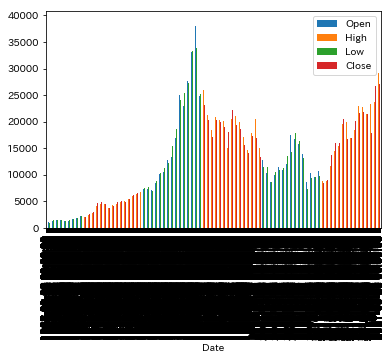

In [12]:
# 'Open', 'High', 'Low', 'Close'グラフ化のために絡む抽出
df_new = df[['Open', 'High', 'Low', 'Close']]

# matplotlibのインポート
from matplotlib import pyplot as plt
%matplotlib inline

# 時系列折れ線グラフの作成
df_new.plot(kind='bar')